# Telecom Customer Churn Prediction

Customer churn is a major issue in telecommunications, where retaining customers is significantly more cost-effective than acquiring new ones. This dataset contains customer-level details including demographics, services subscribed, billing information, and whether the customer churned. I will be building a classification model to predict the customer churn based on the features in the dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
customer_data = pd.read_csv('customer_churn.csv')

In [3]:
#First 5 rows of data
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#dimension of the dataset
customer_data.shape

(7043, 21)

The dataset has:
7043 rows
21 columns

In [5]:
#datatype of columns
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Data Preprocessing

In [6]:
#Check for missing values
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Columns of the dataset
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Columns

1. CustomerID: Unique identifier

2. Gender: Male/Female

3. SeniorCitizen: 0 = No, 1 = Yes

4. Partner: Yes/No

5. Dependents: Yes/No

6. Tenure: Number of months with the company

7. PhoneService: Yes/No

8. MultipleLines: Yes/No/No phone service

9. InternetService: DSL/Fiber optic/No

10. OnlineSecurity: Yes/No/No,

11. OnlineBackup: Yes/No/No,

12. DeviceProtection: Yes/No/No,

13. TechSupport: Yes/No/No,

14. StreamingTV: Yes/No/No,

15. StreamingMovies: Yes/No/No,

16. Contract: Month-to-month/One year/Two year

17. PaperlessBilling: Yes/No

18. PaymentMethod: Electronic check/Mailed check/Bank transfer/Credit card

19. MonthlyCharges: Amount billed monthly

20. TotalCharges: Lifetime total charges

21. Churn: Yes/No

In [9]:
customer_data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [10]:
churn_rate = customer_data.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).reset_index()

In [11]:
churn_rate

,InternetService,Churn,proportion
0,DSL,No,81.040892
1,DSL,Yes,18.959108
2,Fiber optic,No,58.107235
3,Fiber optic,Yes,41.892765
4,No,No,92.595020
5,No,Yes,7.404980


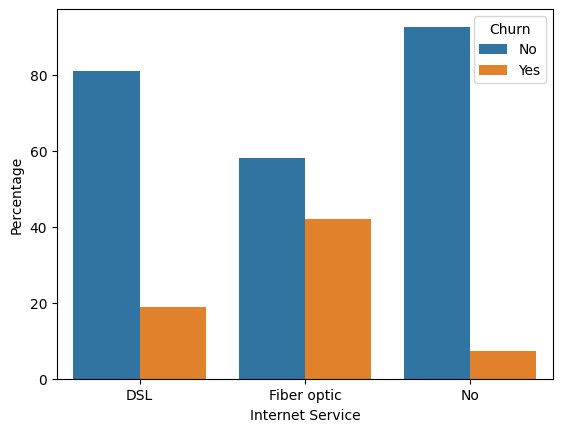

In [12]:
sns.barplot(x='InternetService',y='proportion',hue='Churn',data=churn_rate)
plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.show()

##### So from the chart above 
- 18.95% of the customers who have DSL Internet Service have unsubscribed and the remaining 81.04% have retained
- 41.89% of the customers who have Fiber Optic Internet Service have unsubscribed and the remaining 58.10% have retained
- 7.40%  of the customers who have no Internet Service have unsubscribed and the remaining 92.59% have retained

In [13]:
data = {
    "InternetService":["DSL","Fiber Optic","No"],
    "Churn":[18.95,41.89,7.40],
    "Retained":[81.04,58.10,92.59]
}

In [14]:
data = pd.DataFrame(data)

In [15]:
data

,InternetService,Churn,Retained
0,DSL,18.95,81.04
1,Fiber Optic,41.89,58.10
2,No,7.40,92.59


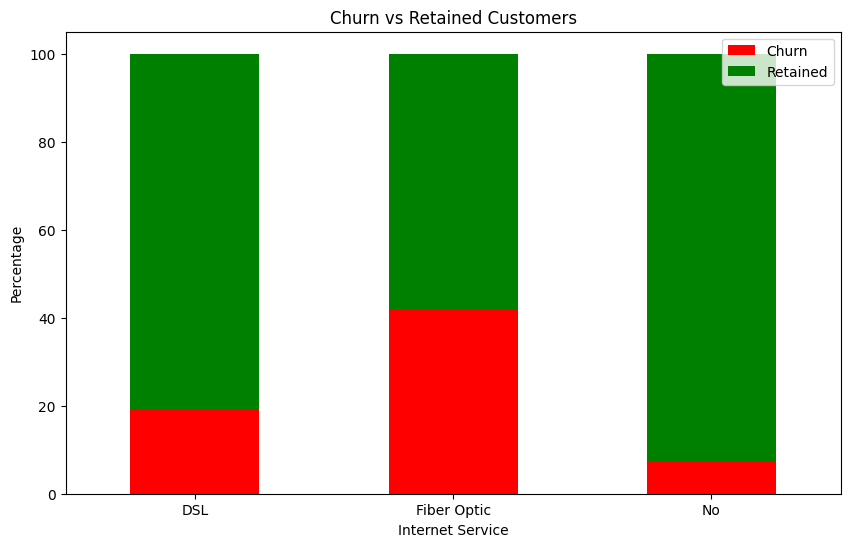

In [16]:
data.set_index("InternetService")[["Churn","Retained"]].plot(kind='bar',stacked=True,color=['red','green'],figsize=(10,6))
plt.title('Churn vs Retained Customers')
plt.xlabel('Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [17]:
churn_rate = customer_data.groupby('gender')['Churn'].value_counts(normalize=True).mul(100).reset_index()

In [18]:
churn_rate

,gender,Churn,proportion
0,Female,No,73.079128
1,Female,Yes,26.920872
2,Male,No,73.839662
3,Male,Yes,26.160338


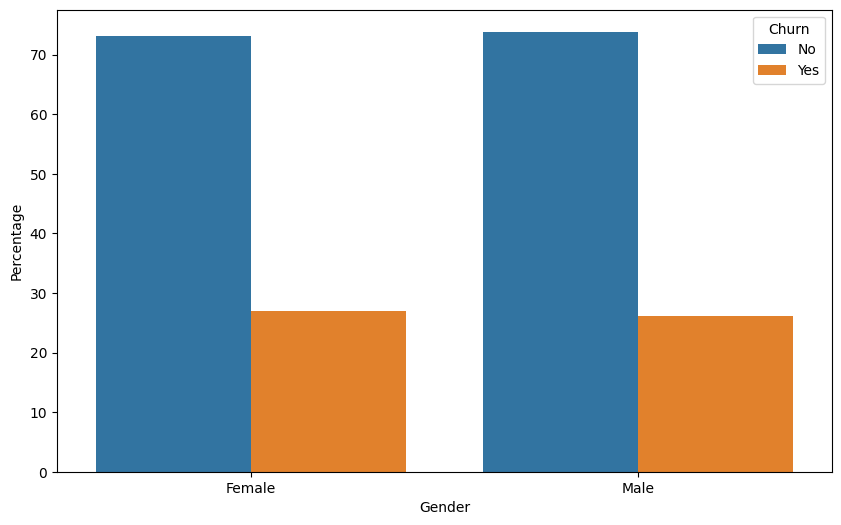

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x='gender',y='proportion',hue='Churn',data=churn_rate)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart
- 26.92 % of females have unsubscribed and remaining 73.07% have retained
- 26.16 % of males have unsubscribed and remaining 73.83% have retained

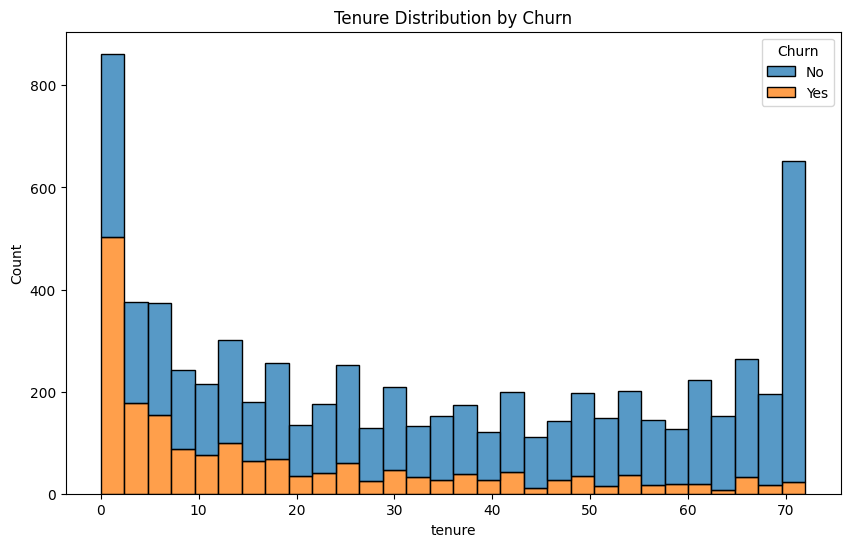

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(x='tenure',hue='Churn',data=customer_data,multiple='stack',bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

##### The chart tells us that
- Low Tenure (0 - 12 months) have high churn
- Medium Tenure (10 - 48 months) churn decreases gradually
- High tenure (60+ months) retention is very high

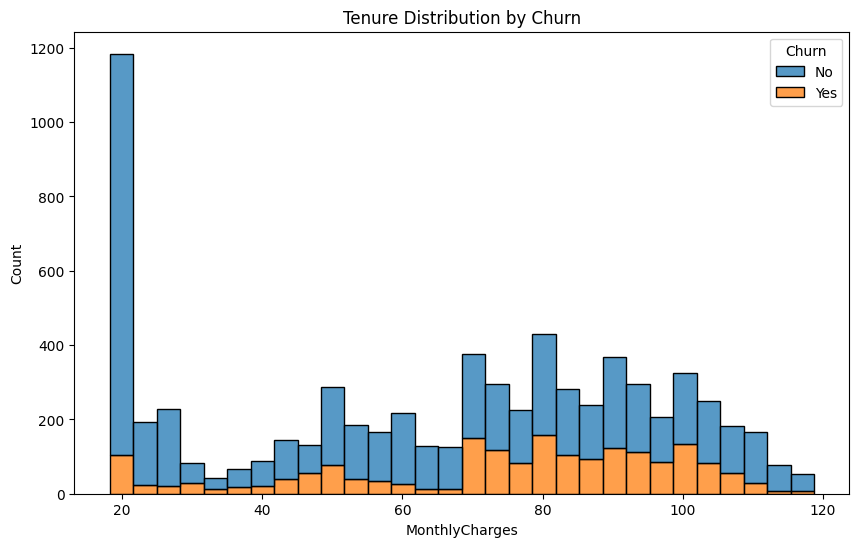

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(x='MonthlyCharges',hue='Churn',data=customer_data,multiple='stack',bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

##### So the chart tells us 
- For low monthly charges, there is less churn
- As the monthly charges increases churning increases

In [89]:
customer_data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

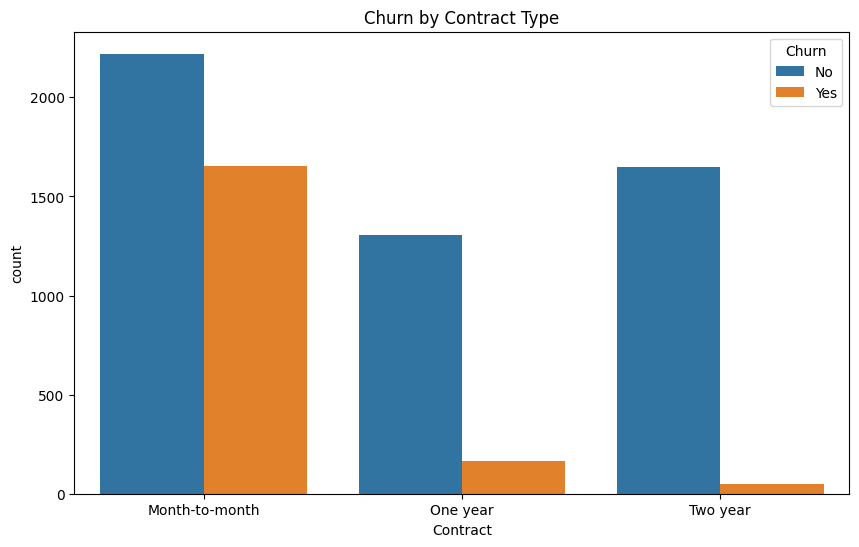

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract',hue='Churn',data=customer_data)
plt.title('Churn by Contract Type')
plt.show()

##### So the above chart tells us
- 42.70% of Monthly Subscribed Customers have unsubscribed and remaining 57.29% have retained
- 11.26% of One-Year Subscription customers have unsubscribed and remaining 88.73% have retained
- 2.83% of Two-Year Subscription customers have unsubscribed and remaining 97.16% have retained

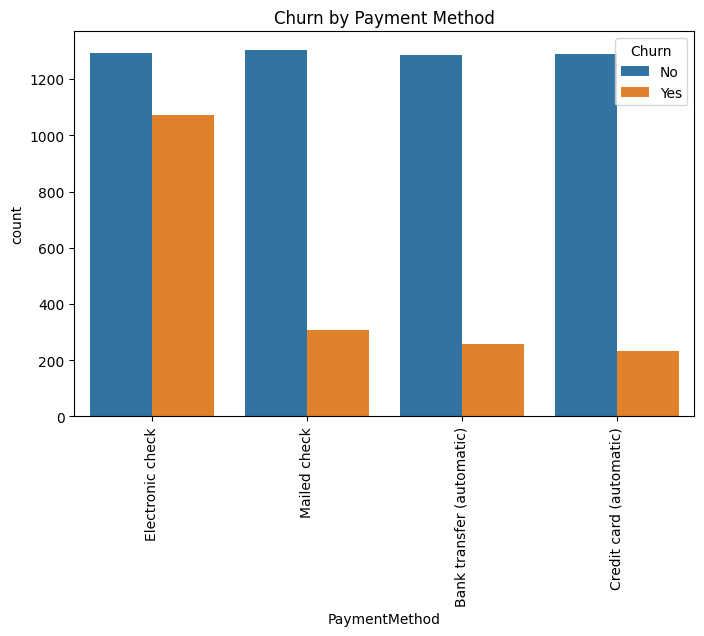

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=customer_data)
plt.title("Churn by Payment Method")
plt.xticks(rotation=90)
plt.show()

##### So the above chart tells us
- 16.70% of customers who have made payment by Bank transfer (automatic) have unsubscribed and remaining 83.29% have retained
- 15.24% of customers who have made payment by Credit card (automatic) have unsubscribed and remaining 84.75% have retained
- 45.28% of customers who have made payment by Electronic cheque have unsubscribed and remaining 54.71% have retained
- 19.10% of customers who have made payment by Mail cheque have unsubscribed and remaining 80.89% have retained

In [92]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
customer_id = customer_data['customerID']

In [94]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [95]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

In [96]:
numeric_columns = customer_data.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns = customer_data.select_dtypes(include=['object']).columns.tolist()

customer_data["TotalCharges"] = pd.to_numeric(customer_data["TotalCharges"], errors="coerce")
customer_data["TotalCharges"].fillna(customer_data["TotalCharges"].median(), inplace=True)
customer_data['TotalCharges'] = customer_data['TotalCharges'].astype('float')

categorical_columns.remove('Churn')
categorical_columns.remove('customerID')
numeric_columns.remove('SeniorCitizen')

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_9808\3313052227.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data["TotalCharges"].fillna(customer_data["TotalCharges"].median(), inplace=True)


In [97]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [98]:
#Normalize the data
scaled_data = scaler.fit_transform(customer_data[numeric_columns])

#Convert categorical to numeric
encoded_data = one_hot_encoder.fit_transform(customer_data[categorical_columns])

churn_data = label_encoder.fit_transform(customer_data['Churn'])

In [99]:
scaled_data = pd.DataFrame(scaled_data,columns=numeric_columns)
encoded_data = pd.DataFrame(encoded_data.toarray(),columns=one_hot_encoder.get_feature_names_out(categorical_columns),index=customer_data.index)
senior_df = customer_data[['SeniorCitizen']]
churn_data = pd.DataFrame(churn_data)

In [100]:
customer_data_processed = pd.concat([senior_df,encoded_data,scaled_data,churn_data],axis=1)

In [102]:
customer_data_processed.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,0
0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.277445,-1.160323,-0.994242,0
1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.066327,-0.259629,-0.173244,0
2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.236724,-0.362660,-0.959674,1
3,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.514251,-0.746535,-0.194766,0
4,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.236724,0.197365,-0.940470,1


In [103]:
customer_data_processed.dtypes

SeniorCitizen                                int64
gender_Female                              float64
gender_Male                                float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No                          float64
OnlineSecurity_No internet service         float64
OnlineSecurity_Yes                         float64
OnlineBackup_No                            float64
OnlineBackup_No internet servic

In [104]:
customer_data_processed.rename(columns={0:'Churn'},inplace=True)

In [105]:
customer_data_processed.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.277445,-1.160323,-0.994242,0
1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.066327,-0.259629,-0.173244,0
2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.236724,-0.362660,-0.959674,1
3,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.514251,-0.746535,-0.194766,0
4,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.236724,0.197365,-0.940470,1


In [106]:
customer_data_processed.shape

(7043, 46)

#### Model Building

In [107]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

In [108]:
X = customer_data_processed.drop('Churn',axis=1)
Y = customer_data_processed['Churn']

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

In [110]:
X_train.shape

(4930, 45)

In [111]:
X_test.shape

(2113, 45)

In [112]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression

In [113]:
pipeline = Pipeline(steps=[
    ('classifier',LogisticRegression(random_state=42))
])

In [114]:
param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.1, 1, 10, 100], 
    "classifier__solver": ["liblinear", "saga"]
}

In [115]:
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [116]:
model = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=cv,scoring='accuracy',verbose=2)

In [117]:
model.fit(X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=saga; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=saga; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l1, classifier__solver=saga; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=0.01, classif

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s
[CV] END classifier__C=1, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=1, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=10, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=10, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga; total time=   0.2s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=100, classifier__penalty=l1, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s


C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s
[CV] END classifier__C=100, classifier__penalty=l2, classifier__solver=saga; total time=   0.1s


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [118]:
model.best_estimator_

,steps,"[('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l1'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


In [119]:
model.best_params_

{'classifier__C': 100,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [120]:
model.best_score_

np.float64(0.8064911031044728)

In [121]:
model.score(X_test,Y_test)

0.8088026502602934

In [122]:
model.score(X_train,Y_train)

0.8056795131845842

In [123]:
yhat = model.predict(X_test)

In [124]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [125]:
accuracy_score(Y_test,yhat)

0.8088026502602934

In [126]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [127]:
conf_matrix = confusion_matrix(Y_test,yhat)

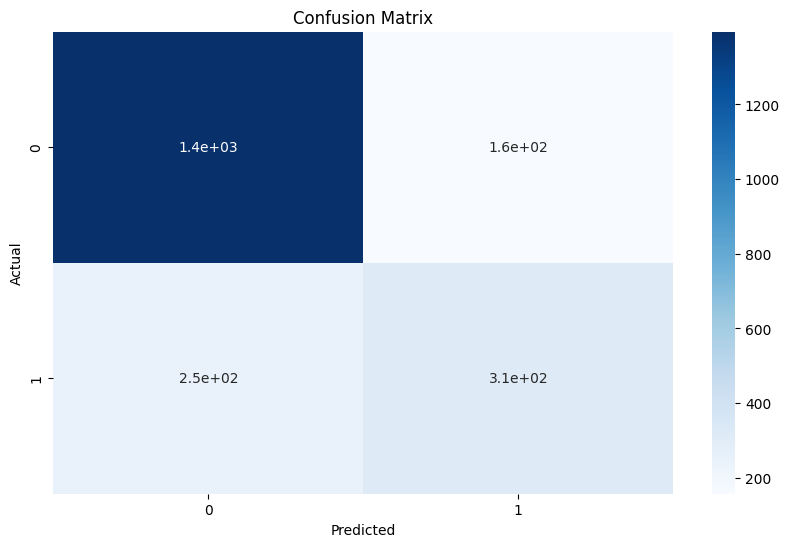

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
best_model = model.best_estimator_

In [130]:
best_model = best_model.named_steps['classifier']

In [131]:
coef = best_model.coef_[0]

In [132]:
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Coefficient':coef
}).sort_values(by='Coefficient',key=abs,ascending=False)

In [133]:
feature_importance_df

,Feature,Coefficient
43,MonthlyCharges,-1.894436
16,OnlineSecurity_No internet service,-1.464771
12,InternetService_DSL,-1.450573
42,tenure,-1.370597
25,TechSupport_No internet service,-1.139805
35,Contract_Two year,-1.136188
7,PhoneService_No,-0.831500
13,InternetService_Fiber optic,0.795311
44,TotalCharges,0.689726
28,StreamingTV_No internet service,-0.527857


In [136]:
prediction_df = X_test.copy()

In [139]:
prediction_df['Churn'] = yhat

In [140]:
prediction_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
4994,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.585198,1.039896,-0.238936,1
6828,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.992402,-1.519271,-0.918374,0
755,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-0.503758,1.122986,-0.193861,1
404,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.503758,-1.497668,-0.822264,0
981,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.310650,-1.500991,-0.650285,0


In [141]:
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [143]:
X_numeric_original = scaler.inverse_transform(prediction_df[numeric_columns])

In [144]:
X_numeric_original = pd.DataFrame(X_numeric_original,columns=numeric_columns)

In [145]:
X_numeric_original

,tenure,MonthlyCharges,TotalCharges
0,18.0,96.05,1740.70
1,8.0,19.05,201.70
2,20.0,98.55,1842.80
3,20.0,19.70,419.40
4,40.0,19.60,808.95
...,...,...,...
2108,25.0,20.05,520.10
2109,68.0,60.30,4109.00
2110,35.0,61.20,2021.20
2111,13.0,45.30,528.45


In [150]:
ohe_categories = one_hot_encoder.categories_

In [152]:
start_col = 0

In [153]:
X_cat_original = pd.DataFrame()

In [158]:
for cat_name,cats in zip(categorical_columns,ohe_categories):
    n = len(cats)
    sub_df = X_cat_original.iloc[:, start_col:start_col+n]  # slice relevant one-hot columns
    cat_values = []
    for i in range(sub_df.shape[0]):
        idx = sub_df.iloc[i].values.argmax()
        cat_values.append(cats[idx])
    X_cat_original[cat_name] = cat_values
    start_col += n

In [160]:
predicted_df = pd.concat([
    X_numeric_original.reset_index(drop=True),
    X_cat_original.reset_index(drop=True),
    prediction_df[['Churn']].reset_index(drop=True)
], axis=1)


In [161]:
predicted_df

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,18.0,96.05,1740.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,8.0,19.05,201.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,20.0,98.55,1842.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,20.0,19.70,419.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,40.0,19.60,808.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,25.0,20.05,520.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2109,68.0,60.30,4109.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2110,35.0,61.20,2021.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2111,13.0,45.30,528.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
